# **Ecommerce Dataset**

**Dataset Description**

This dataset contaisn behavior data for February and April 2020, from a large multi-category online store located in the Middle East.

Each row in the file represents an event. All events are related to products and users. Each event is like many-to-many relation between products and users.

**Dataset link:**
https://www.kaggle.com/mkechinov/ecommerce-behavior-data-from-multi-category-store 

**Dataset structure:**


*   event_time
*   event_type
*   product_id
*   category_id
*   category_code
*   brand
*   price
*   user_id
*   user_session













**Goal**

For this project, we want to enhance eCommerce by understanding consumer behaviour with the insights of the dataset. Enabling to answer: "How does COVID-19 impact E-commerce?".


Our goal is analyzing customer online purchasing behavior during pre covid-19 and post covid-19 using February and April dataset, respectively. Which allows us to understand the traffic of the website and conversion made by consumers to potential solve E-commerce’s dataset problems, and expand the opportunities for marketing campaigns, target promotions and optimizing the inventory level.

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

First, Let's have a look at FEB, 2020's table (pre-COVID):

In [ ]:
%%bigquery --project ba775-team-4b
SELECT brand, count(brand) AS total_brand_purchase
FROM `ba775-team-4b.4b_dataset.ecommerce_feb_2020` 
WHERE event_type = 'purchase'
GROUP BY brand
ORDER BY count(brand) DESC
LIMIT 10

,brand,total_brand_purchase
0,samsung,272529
1,apple,268971
2,xiaomi,108343
3,huawei,41163
4,lucente,22638
5,oppo,18628
6,lg,13083
7,acer,12155
8,sony,11117
9,artel,9403


Results: We noticed that Samsung is consumer’s favorite brand, followed by Apple and Xiaomi. All electronic brands!

In [ ]:
%%bigquery --project ba775-team-4b
SELECT 
COUNTIF(event_type = 'purchase')/COUNT(event_type) AS conversion_rate, 
category_code,
ROUND(sum(price), 2) AS total_Price
FROM `ba775-team-4b.4b_dataset.ecommerce_feb_2020` 
GROUP BY category_code
ORDER BY Conversion_rate DESC
limit 10

,conversion_rate,category_code,total_Price
0,0.039678,construction.tools.light,6.924581e+09
1,0.033384,apparel.trousers,1.176035e+07
2,0.031790,sport.bicycle,2.612554e+08
3,0.029122,appliances.kitchen.coffee_grinder,1.516006e+08
4,0.023554,computers.peripherals.monitor,1.224788e+06
5,0.022951,appliances.iron,2.446870e+05
6,0.022474,appliances.kitchen.washer,2.495541e+08
7,0.021946,construction.components.faucet,1.307150e+08
8,0.021524,appliances.personal.massager,6.414340e+08
9,0.021168,furniture.bedroom.blanket,1.182731e+08


Results: It shows that the highest conversion rate is the construction tools with a rate of 0.0397, followed by apparel with a rate of 0.0334.

In [ ]:
%%bigquery --project ba775-team-4b
SELECT user_id, ROUND(SUM(price)) AS total_spending_FEB
FROM `ba775-team-4b.4b_dataset.ecommerce_feb_2020`
WHERE event_type = 'purchase'
GROUP BY user_id
ORDER BY total_spending_FEB DESC
LIMIT 10

,user_id,total_spending_FEB
0,563051763,302726.0
1,610871788,292203.0
2,529168923,277318.0
3,598224683,247694.0
4,569374504,235511.0
5,522482125,219680.0
6,590847617,213194.0
7,613954635,206130.0
8,549109608,182247.0
9,541733121,179060.0


Result: our Top consumer identified as user_id: 563051763 spent around $302,726.0 on the webpage.

In [ ]:
%%bigquery --project ba775-team-4b
SELECT ROUND(AVG(price), 2) as avg_spending_feb
FROM `ba775-team-4b.4b_dataset.ecommerce_feb_2020`
WHERE event_type = 'purchase'
LIMIT 10

,avg_spending_feb
0,317.57


Result: The average of users’ spendings for the month of February is $317.57.

In [ ]:
%%bigquery --project ba775-team-4b
SELECT user_id AS USER_ID, ROUND(SUM(price)) AS TOTAL_SPENDING, COUNT(user_session) as TOTAL_SESSIONS, 
(
SELECT round(AVG(price), 2) as avg_spending
FROM `ba775-team-4b.4b_dataset.ecommerce_feb_2020`
WHERE event_type = 'purchase'
) as AVG_SPENDING_OF_ALL_USERS
 
  FROM `ba775-team-4b.4b_dataset.ecommerce_feb_2020`
  WHERE user_id = 563051763 and event_type = 'purchase'
  GROUP BY user_id

,USER_ID,TOTAL_SPENDING,TOTAL_SESSIONS,AVG_SPENDING_OF_ALL_USERS
0,563051763,302726.0,264,317.57


This query shows the top buyer who have spend the most in this ecommerce website, and the average of all users' spendings.

Now, we would check April, 2020's table (post-COVID).

In [ ]:
%%bigquery --project ba775-team-4b
SELECT brand, count(brand) AS total_brand_purchase
FROM `ba775-team-4b.4b_dataset.ecommerce_april_2020`
WHERE event_type = 'purchase'
GROUP BY brand
ORDER BY count(brand) DESC
LIMIT 10

,brand,total_brand_purchase
0,samsung,220305
1,apple,97694
2,xiaomi,63382
3,huawei,30754
4,oppo,24498
5,lg,17600
6,acer,12529
7,arg,11977
8,artel,11686
9,lenovo,11676


Results: We noticed that the results are the same as pre-COVID (February). Samsung is still consumer’s favorite brand, followed by Apple and Xiaomi. All electronic brands!

In [ ]:
%%bigquery --project ba775-team-4b
SELECT countif(event_type = 'purchase')/count(event_type) AS Conversion_rate, category_code, sum(price) Total_Price
FROM `ba775-team-4b.4b_dataset.ecommerce_april_2020`
GROUP BY category_code
ORDER BY Conversion_rate DESC
limit 10

,Conversion_rate,category_code,Total_Price
0,0.038462,stationery.paper,3.001600e+02
1,0.037915,appliances.kitchen.microwave,4.601638e+04
2,0.025873,construction.tools.light,6.016810e+09
3,0.024909,apparel.trousers,1.444334e+07
4,0.023162,appliances.environment.fan,1.147744e+05
5,0.020105,kids.swing,3.339037e+07
6,0.018161,appliances.iron,6.491237e+04
7,0.018007,furniture.universal.light,8.076204e+06
8,0.017219,sport.bicycle,1.820103e+08
9,0.016626,electronics.camera.photo,1.650642e+07


Results: It shows that the highest conversion rate is the stationery paper with a rate of 0.038, followed by kitchen appliances with a small difference of 0.0005.

In [ ]:
%%bigquery --project ba775-team-4b
SELECT user_id, round(SUM(price), 2) as total_spending
FROM `ba775-team-4b.4b_dataset.ecommerce_april_2020`
WHERE event_type = 'purchase'
GROUP BY user_id
ORDER by total_spending DESC
LIMIT 10

,user_id,total_spending
0,553446649,122525.19
1,566213018,119393.24
2,518514888,114484.63
3,628167977,113917.23
4,522016074,103291.35
5,548782814,100853.54
6,635021608,98535.34
7,555546931,97364.51
8,629426279,91844.44
9,627964145,81366.71


Results: our Top consumer identified as user_id: '553446649' spent around $122,525.19 on the webpage, which is way more lower than in February. This leads to a better understanding of consumers' behaviour that due the pandemic consumers had shifted their values, and cutting down unneed purchases to essentials.

In [ ]:
%%bigquery --project ba775-team-4b
SELECT ROUND(AVG(price), 2) as avg_spending_of_all_users
FROM `ba775-team-4b.4b_dataset.ecommerce_april_2020`
WHERE event_type = 'purchase'

,avg_spending_of_all_users
0,252.93


Result: As we expected, the average of users’ spendings also decreased during pandemic. Average for April is `$252.93`, while for Feb was `$317.57`.

In [ ]:
%%bigquery --project ba775-team-4b
SELECT user_id AS USER_ID, ROUND(SUM(price)) AS TOTAL_SPENDING,COUNT(user_session) AS TOTA_SESSIONS,  
(
SELECT round(AVG(price), 2) as avg_spending
FROM `ba775-team-4b.4b_dataset.ecommerce_april_2020`
WHERE event_type = 'purchase'
) as AVG_SPENDING_OF_ALL_USERS
 
  FROM `ba775-team-4b.4b_dataset.ecommerce_april_2020`
  WHERE user_id = 553446649 and event_type = 'purchase'
  GROUP BY user_id

,USER_ID,TOTAL_SPENDING,TOTA_SESSIONS,AVG_SPENDING_OF_ALL_USERS
0,553446649,122525.0,179,252.93


This query shows the top buyer who have spend the most in this ecommerce website, and the average of all users' spendings.

Let's check deeper the insights by combining both datasets!

In [ ]:
%%bigquery --project ba775-team-4b
SELECT 
user_id,
COUNT(user_id) AS returning
FROM
(
SELECT user_id, event_type
FROM `ba775-team-4b.4b_dataset.ecommerce_feb_2020` AS FEB
UNION ALL
SELECT user_id, event_type
FROM `ba775-team-4b.4b_dataset.ecommerce_april_2020` AS APR
)
WHERE event_type = 'purchase'
GROUP BY user_id
HAVING COUNT(user_id) > 1
ORDER BY returning DESC
LIMIT 10

,user_id,returning
0,609817194,573
1,598224683,525
2,582826305,516
3,568782581,504
4,628167977,457
5,613954635,428
6,549109608,344
7,563599039,327
8,608152627,327
9,541733144,317


Results: Our top consumer identified as user_id: ‘609817194’ returned back to the website 573 times. Surprisingly, we found out that our top consumer from the month of February and April are not in the Top 10 returnings. This means that our valuable consumers from February and April are more likely to purchase buy in builk in less amount of sessions than spending their time returning on the website.

In [ ]:
%%bigquery --project ba775-team-4b
SELECT 
category_code,
(total_sales_apr - total_sales_feb)/total_sales_feb AS percent_change
FROM
(
SELECT *
FROM 
    (SELECT 
category_code,
SUM(price) AS total_sales_apr
FROM `ba775-team-4b.4b_dataset.ecommerce_april_2020`
WHERE category_code IS NOT NULL AND event_type = 'purchase'
GROUP BY category_code
ORDER BY  total_sales_apr DESC
) AS apr
    
INNER JOIN 
    
    (SELECT 
category_code AS cat,
SUM(price) AS total_sales_feb,
FROM `ba775-team-4b.4b_dataset.ecommerce_feb_2020` 
WHERE category_code IS NOT NULL and event_type = 'purchase'
GROUP BY category_code
ORDER BY total_sales_feb DESC) AS feb
    
ON apr.category_code = feb.cat
)
ORDER BY total_sales_feb DESC
LIMIT 10


,category_code,percent_change
0,construction.tools.light,-0.494748
1,electronics.audio.headphone,0.489696
2,appliances.personal.massager,0.052344
3,electronics.clocks,-0.632624
4,sport.bicycle,-0.625624
5,appliances.kitchen.refrigerators,0.527003
6,appliances.kitchen.washer,-0.127324
7,appliances.kitchen.coffee_grinder,-0.789130
8,apparel.shoes,0.062457
9,computers.peripherals.printer,-0.665558


Results: Most popular categories have lower sales in April than in February. But headphone, massager and refrigerators categories have higher sales in April. It might casued by working from home.


In [ ]:
%%bigquery --project ba775-team-4b
select count(event_type) as feb_visits, 

(select round(sum(price),2) as profit_from_feb from `ba775-team-4b.4b_dataset.ecommerce_feb_2020` where event_type = 'purchase')feb_profit,

(select count(event_type) as total_visits_april FROM `ba775-team-4b.4b_dataset.ecommerce_april_2020`
where event_type = 'view'
group by event_type) april_visits,

(select round(sum(price),2) as profit_from_april from `ba775-team-4b.4b_dataset.ecommerce_april_2020` where event_type = 'purchase') april_profit

 FROM `ba775-team-4b.4b_dataset.ecommerce_feb_2020`
where event_type = 'view'
group by event_type

,feb_visits,feb_profit,april_visits,april_profit
0,51232669,3.811789e+08,62353909,2.445258e+08


Result: There is a negative correlation between the number of views and consumer's spending on each month. April visits times increased by 9.8% since February. This might be cause due COVID-19, consumers are more mindful of their spending and tragin down, as they expect the pandemic to last for a longer period of time.

In [ ]:
%%bigquery --project ba775-team-4b
SELECT 
A.*,FEB_total_sales,round(APR_total_sales-FEB_total_sales,2) FEB_APR_SalesDifferences, 
round(((APR_total_sales-FEB_total_sales)/FEB_total_sales),2)  FEB_APR_SalesChanges_percentage
FROM
(SELECT A.*,B.APR_total_sales
FROM 
(SELECT A.brand,A.category_code,count(A.brand) AS count_APR_brand_sales, count_FEB_brand_sales
FROM `ba775-team-4b.4b_dataset.ecommerce_april_2020`A

LEFT JOIN 
(SELECT brand,category_code,count(brand) AS count_FEB_brand_sales
FROM `ba775-team-4b.4b_dataset.ecommerce_feb_2020`
WHERE event_type = 'purchase' and brand = 'samsung' AND category_code IS NOT NULL 
GROUP BY category_code,brand
) B
USING(category_code)

WHERE event_type = 'purchase' and A.brand = 'samsung' AND category_code IS NOT NULL
GROUP BY category_code,brand,count_FEB_brand_sales 
ORDER BY count_APR_brand_sales DESC

limit 15)
A
LEFT JOIN
(SELECT category_code,round(sum(price),2) as APR_total_sales 
FROM `ba775-team-4b.4b_dataset.ecommerce_april_2020`
WHERE brand = 'samsung' AND event_type = 'purchase' AND category_code IS NOT NULL
GROUP BY category_code
) B
USING(category_code)
) A

LEFT JOIN 
(
SELECT category_code,round(sum(price),2) as FEB_total_sales 
FROM `ba775-team-4b.4b_dataset.ecommerce_feb_2020`
WHERE brand = 'samsung' AND event_type = 'purchase' AND category_code IS NOT NULL
GROUP BY category_code
) B
USING(category_code)


,brand,category_code,count_APR_brand_sales,count_FEB_brand_sales,APR_total_sales,FEB_total_sales,FEB_APR_SalesDifferences,FEB_APR_SalesChanges_percentage
0,samsung,construction.tools.light,184103,232703,45963013.54,62945179.08,-16982165.54,-26.98
1,samsung,appliances.personal.massager,12226,10997,5950085.11,5670117.86,279967.25,4.94
2,samsung,appliances.environment.vacuum,6888,5961,658085.14,593468.30,64616.84,10.89
3,samsung,sport.bicycle,3610,6168,273569.66,583450.30,-309880.64,-53.11
4,samsung,appliances.kitchen.washer,3299,3752,1350346.76,1487822.83,-137476.07,-9.24
5,samsung,apparel.shoes.slipons,2857,4050,797139.25,832911.60,-35772.35,-4.29
6,samsung,electronics.clocks,1471,4564,376984.70,1117730.48,-740745.78,-66.27
7,samsung,construction.tools.welding,1276,463,32216.81,7241.87,24974.94,344.87
8,samsung,appliances.kitchen.refrigerators,1246,1064,822494.35,735077.60,87416.75,11.89
9,samsung,appliances.environment.air_conditioner,856,56,300774.71,26721.28,274053.43,1025.60


Result: most of the February's top-selling categories for samsung increased a lot in April, especially for air conditioner category. We also noticed that personal massagers, household electrodomestics and others equipment had rase as the pandemic shifted their necessities. 

### The Abandon Rate of the website:

The abandon rate can be used as the metric to evaluate the purchase power of the users. The abandon rate of a certain user = 1-(number of 'purchase' event /number of 'cart' event). Only the user info with high abandon rate(#>0.9) is included and have the potential to work on increasing sales conversion, such as sending target promotions, poping promotional codes, running market campaigns, etc. 

Note: We noticed that for some users purchased more than they carted and will make abandon rate calculated less than 0, which can be high indication of purchase power. Hereby we dropped those users as they are not target audience for this part. 

In [ ]:
%%bigquery --project ba775-team-4b
SELECT a.user_id, 
a.cart_count, 
ifnull(b.purchase_count,0) as purchase_count,  
round((ifnull(b.purchase_count,0)/a.cart_count),3)as purchase_rate,
round((1-(ifnull(b.purchase_count,0)/a.cart_count)),3) as abandon_rate
FROM `ba775-team-4b.4b_dataset.cart_count_per_user_id` a 
left join 
`ba775-team-4b.4b_dataset.purchase_count_per_user_id` b
using (user_id)
where a.cart_count>=b.purchase_count and round((1-(ifnull(b.purchase_count,0)/a.cart_count)),3)	> 0.9
order by abandon_rate desc

,user_id,cart_count,purchase_count,purchase_rate,abandon_rate
0,561551750,360,1,0.003,0.997
1,608003747,195,1,0.005,0.995
2,563734569,190,1,0.005,0.995
3,550184410,183,1,0.005,0.995
4,556674722,158,1,0.006,0.994
...,...,...,...,...,...
5522,571554341,41,4,0.098,0.902
5523,514207043,41,4,0.098,0.902
5524,513217248,41,4,0.098,0.902
5525,529177706,41,4,0.098,0.902


In [ ]:
%%bigquery --project ba775-team-4b
SELECT a.user_id, 
a.cart_count, 
ifnull(b.purchase_count,0) as purchase_count,  
round((ifnull(b.purchase_count,0)/a.cart_count),3)as purchase_rate,
round((1-(ifnull(b.purchase_count,0)/a.cart_count)),3) as abandon_rate
FROM `ba775-team-4b.4b_dataset.purchase_per_userid _april` a 
left join 
`ba775-team-4b.4b_dataset.purchase_count_per_userid_april` b
using (user_id)
where a.cart_count>=b.purchase_count and round((1-(ifnull(b.purchase_count,0)/a.cart_count)),3)	> 0.9
order by abandon_rate desc

,user_id,cart_count,purchase_count,purchase_rate,abandon_rate
0,635323703,314,1,0.003,0.997
1,636877416,275,1,0.004,0.996
2,622860781,171,1,0.006,0.994
3,532696490,164,1,0.006,0.994
4,589825766,153,1,0.007,0.993
...,...,...,...,...,...
7175,574687240,41,4,0.098,0.902
7176,622006975,41,4,0.098,0.902
7177,532167047,41,4,0.098,0.902
7178,635886225,41,4,0.098,0.902


## Machine Learning Models:

For the purpouse of this project, we created several models using cluster analysis, a powerful data-mining tool, to organize and identify discrete groups of customers.


### Model 1: model.users
This table below calculates the number of products they purchased on different categories in April, we will use this table to run our models.

In [ ]:
%%bigquery --project ba775-team-4b
SELECT * 
FROM `ba775-team-4b.4b_dataset.different_categories_APR`

,user_id,num_of_accessories,num_of_apparel,num_of_appliances,num_of_auto,num_of_computers,num_of_construction,num_of_country_yard,num_of_electronics,num_of_furniture,num_of_kids,num_of_medicine,num_of_sport,num_of_stationery
0,616664909,0,2,0,3,76,3,0,0,10,0,0,0,0
1,619599757,0,12,4,0,39,0,0,0,0,0,0,0,0
2,580768334,0,1,1,3,35,6,0,1,3,0,2,1,0
3,621730545,0,0,12,0,34,5,0,32,0,0,0,12,0
4,635777499,0,0,0,0,32,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452065,594675773,0,0,0,0,0,0,0,0,0,0,0,1,0
452066,602710306,0,0,0,0,0,0,0,0,0,0,0,1,0
452067,605062462,0,0,0,0,0,0,0,0,0,0,0,1,0
452068,524778346,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
CREATE MODEL
  model.users
OPTIONS
  ( model_type = 'kmeans',
    num_clusters = 2,
    distance_type = 'euclidean') AS
SELECT 
num_of_accessories,num_of_apparel,num_of_appliances,num_of_auto,num_of_computers,num_of_construction,num_of_country_yard,num_of_electronics,num_of_furniture,num_of_kids,num_of_medicine,num_of_sport,num_of_stationery
FROM `ba775-team-4b.4b_dataset.different_categories_april_2020`

As you see the image below, the K-means model automatically divided the users into two groups. In this model, we used 13 features, which are the times the user purchased in each 13 categories in one month.

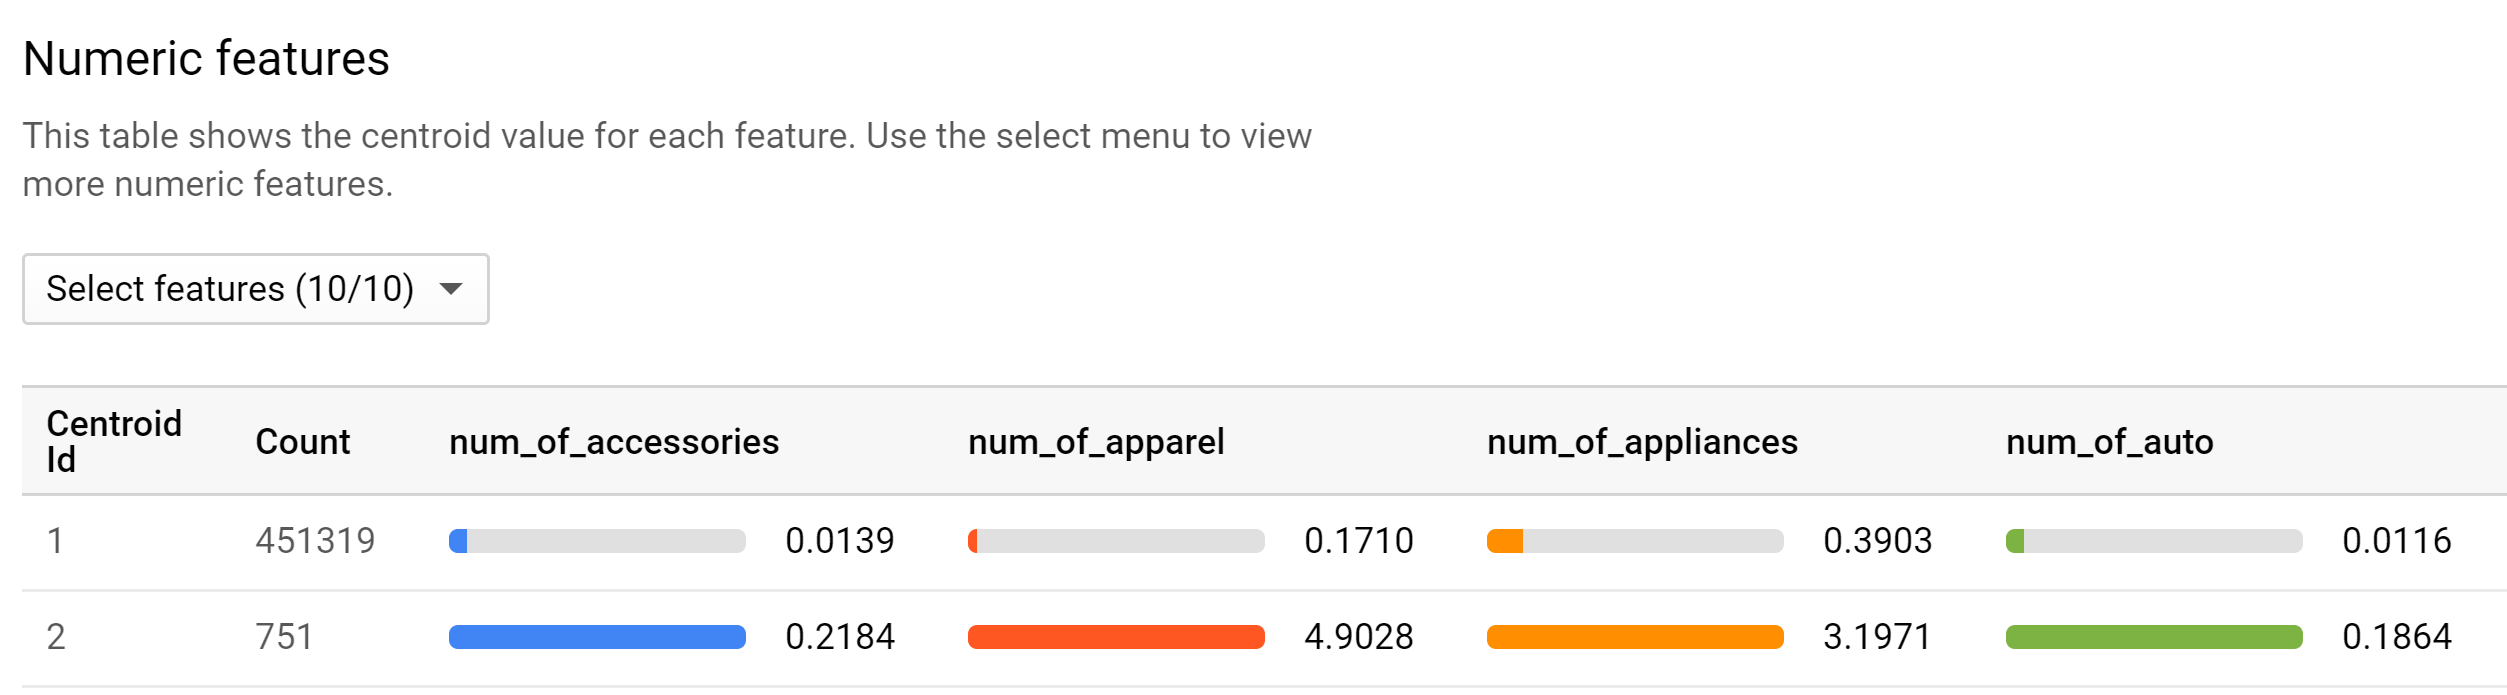

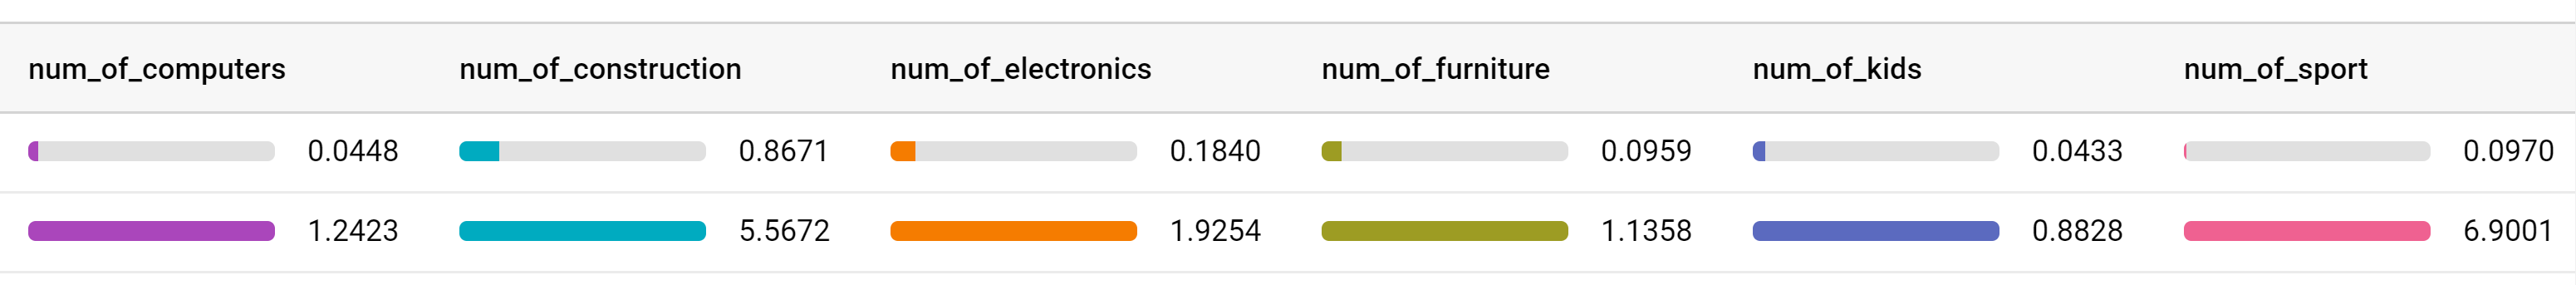

Results: For cluster one, there are 451,319 users, compared with users in cluster two, they did not purchase many items in each of the 13 categories. It is very likely that they only purchased one times in some of the 13 categories, as a result, the users in cluster one are more likely to be individuals. 

As for cluster two, although there are only 751 users, they have relatively high transaction times in every category, espacially in apparel, appliances, construction(electronics) and sport, this cluster are more likely to be the business customers. 

### Model 2: model.products

In [ ]:
CREATE MODEL
  model.products
OPTIONS
  ( model_type = 'kmeans',
    num_clusters = 2,
    distance_type = 'euclidean') AS
SELECT 
category_code, brand, price, count(product_id) as num_of_action
FROM `ba775-team-4b.4b_dataset.ecommerce_april_2020`
WHERE event_type='purchase'
GROUP BY category_code, product_id, brand, price

The evaluation shows below:

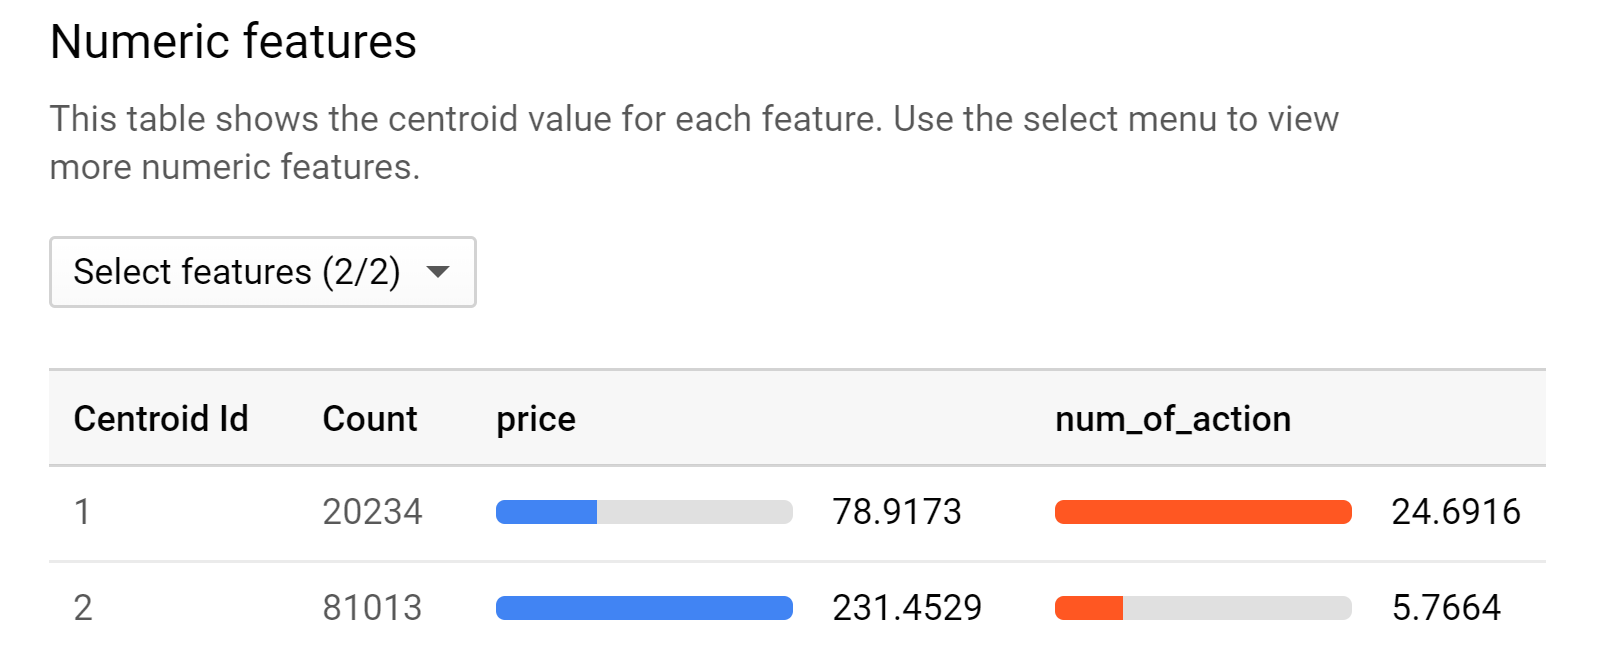

The second K-means model automatically divided the products into two clusters. The cluster one has 20,234 products and cluster two has 81,013 products. The price of products in cluster one are lower than cluster two, but the products in cluster one are more likely to be viewed, carted or purchased.

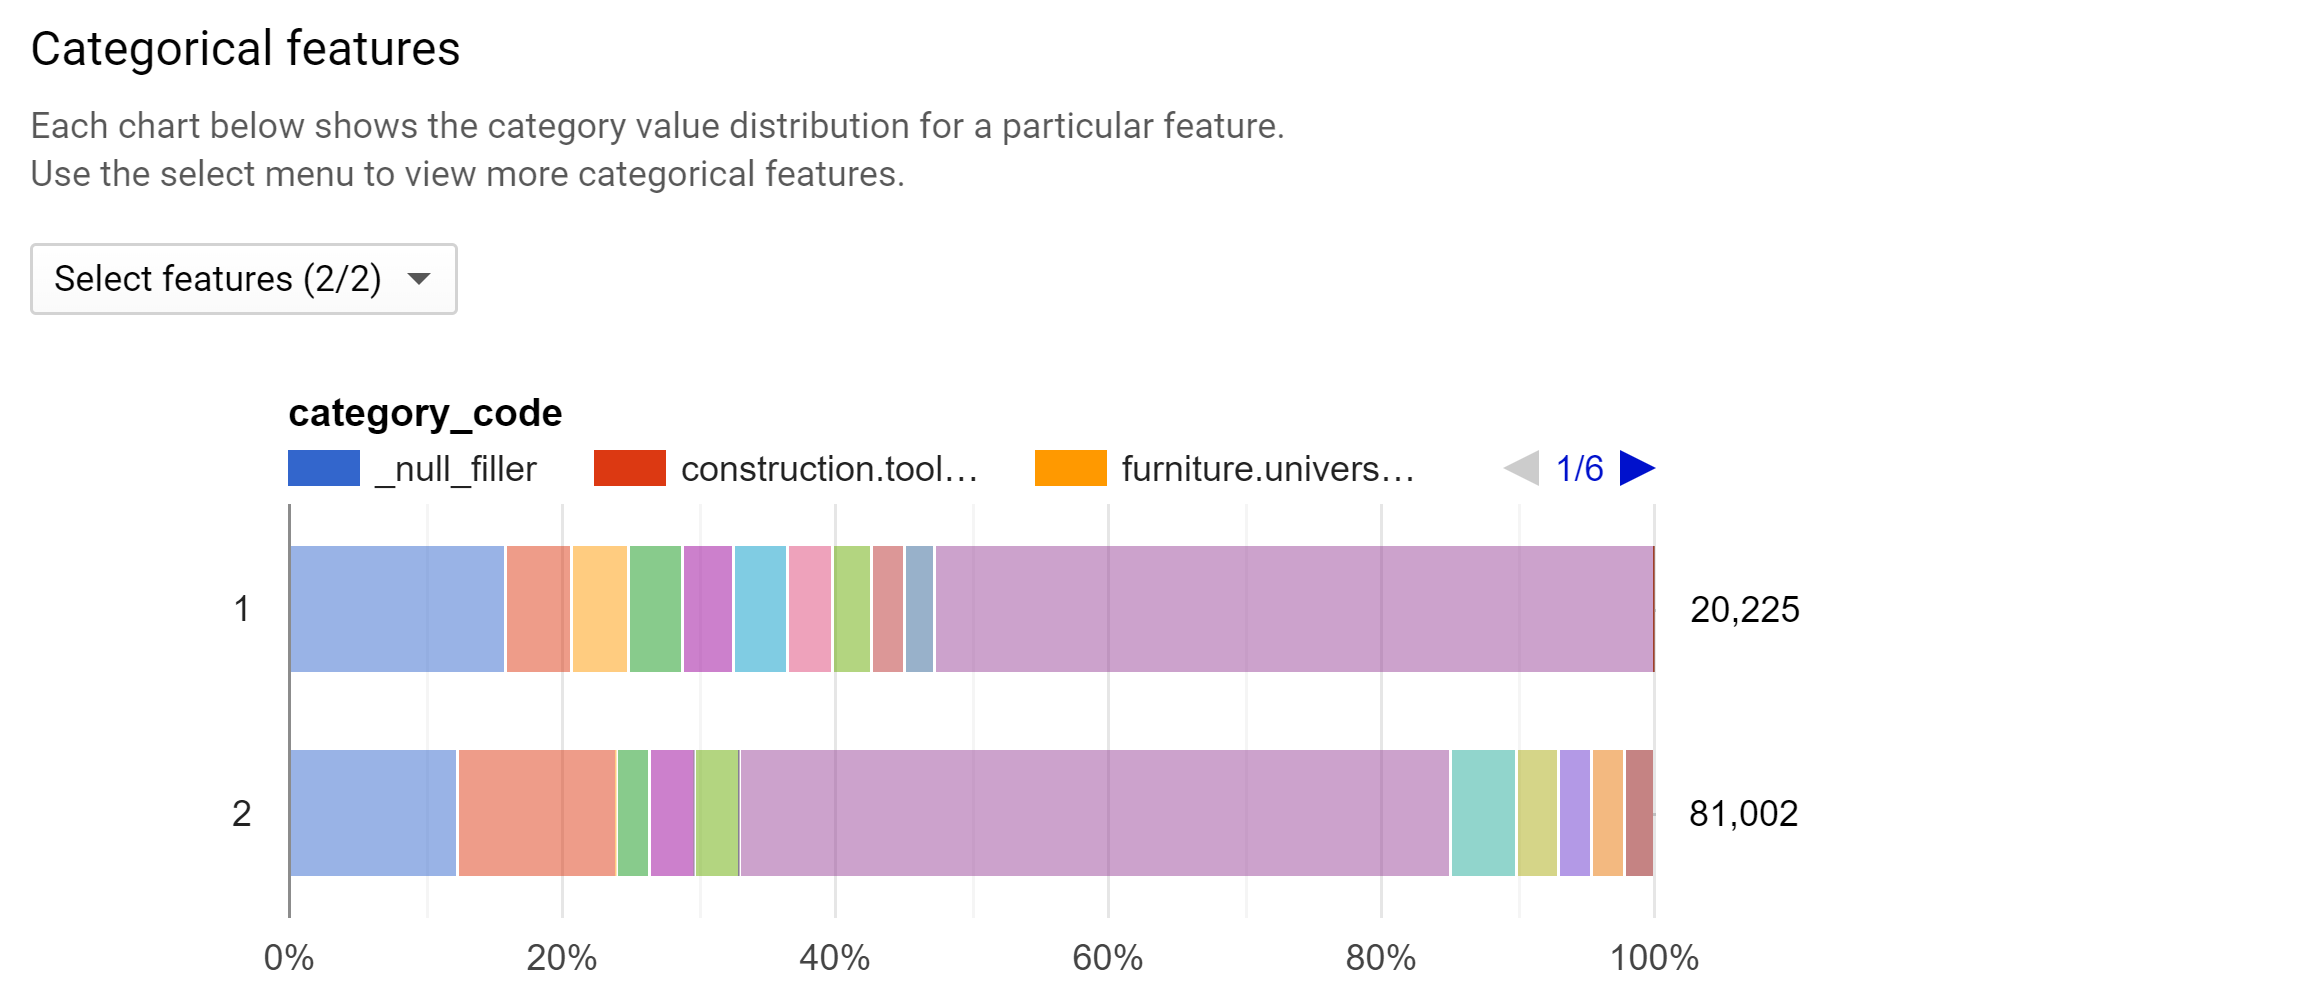

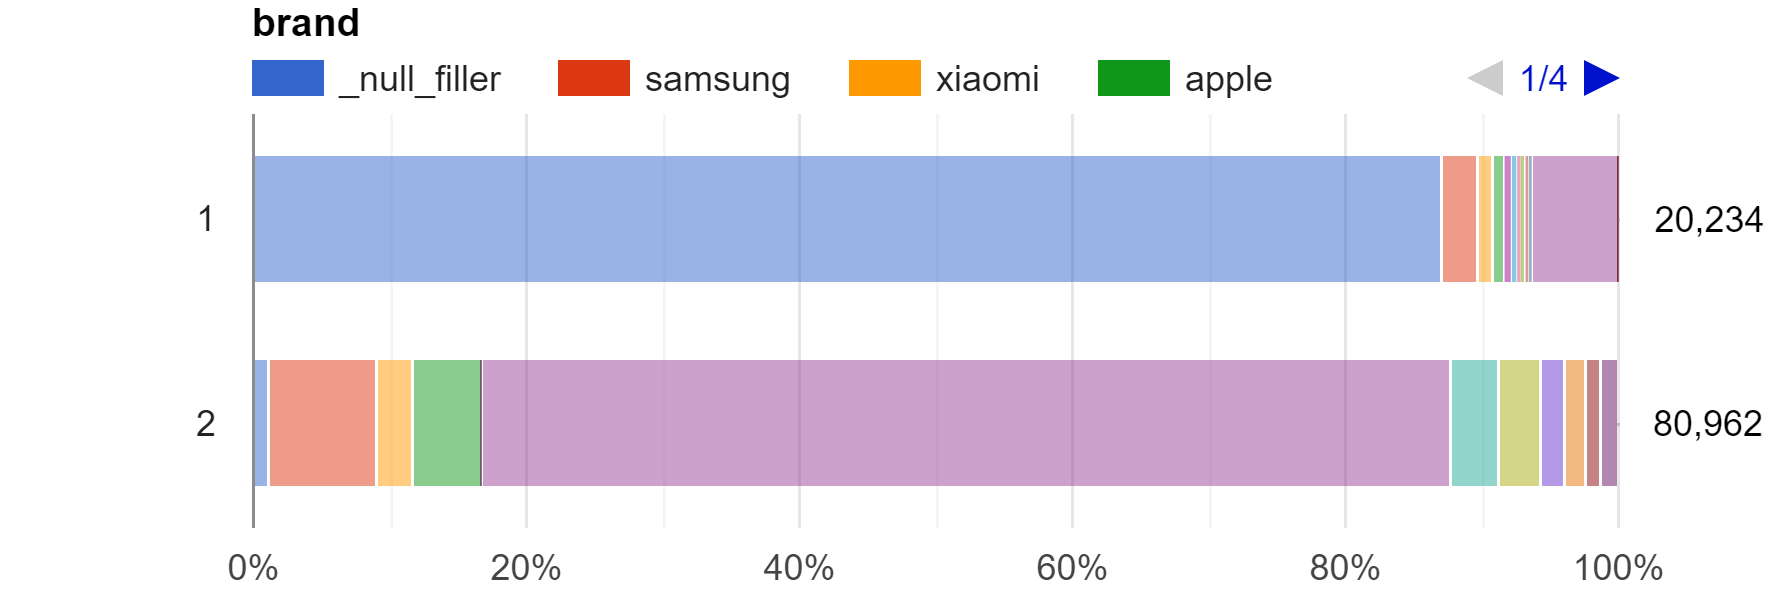

In category_code, except others and NULL values, there are 4.81% of products in cluster one are construction and 4.07% are furniture. Also, there are 11.59% of products in cluster two are construction and 4.79% are appliances.
As for brand, except others and NULL values, 2.53% of products are from samsung company in the cluster one, and 7.96% of products are from samsung and 5.12% of products are from Apple company in the cluster two.

# **Ecommerce Dashboard**

Tableau Online: 
https://prod-useast-a.online.tableau.com/t/soltaniehha/views/BA775Team4bProject_16040742108920/EcommerceDashboard?:origin=card_share_link&:embed=n

In [ ]:
from IPython.display import Image

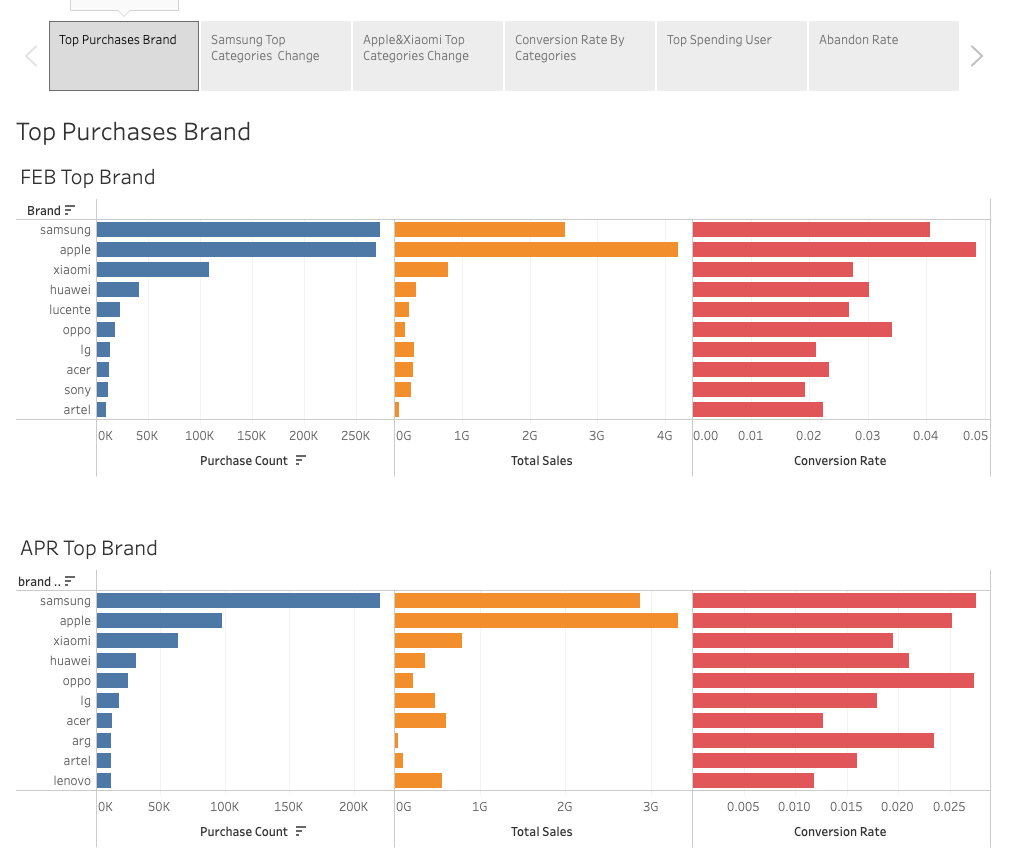

In [ ]:
# Top Purchase Brand of Feberary and April
Image(filename='Top Brand.png')

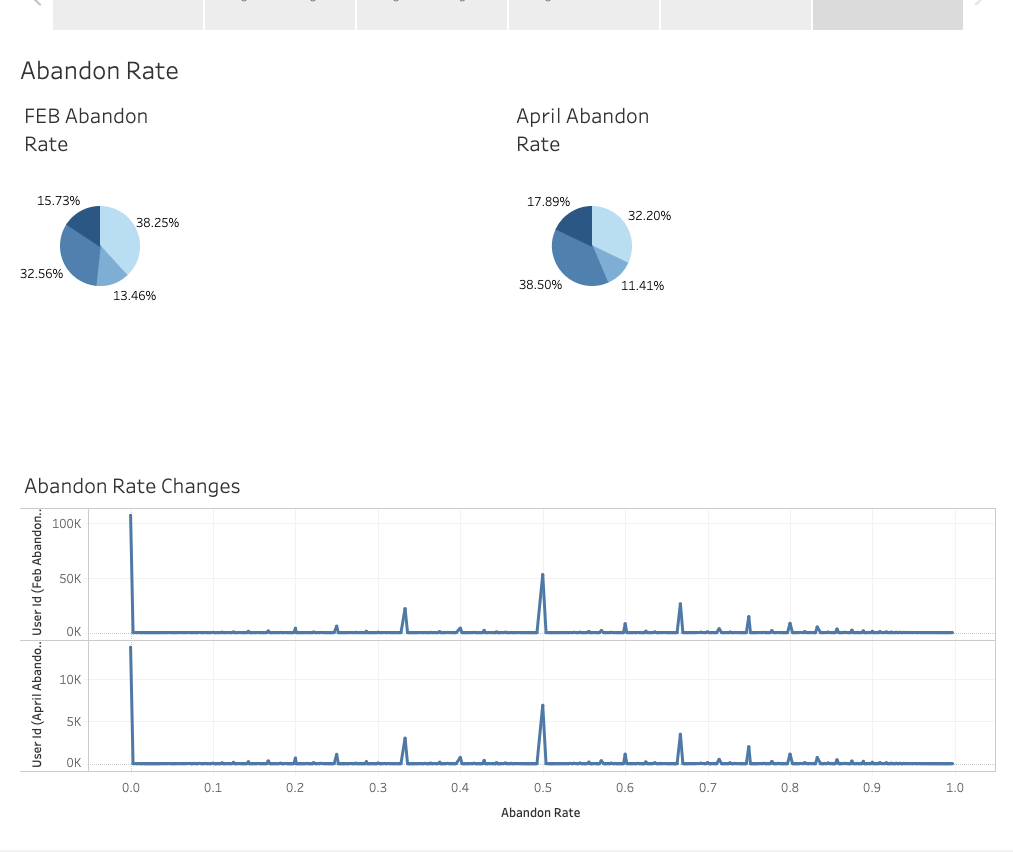

In [ ]:
# Abandon Rate of Feberary and April
Image(filename='Abandon Rate.png')